# 3/4 Report

<!--Problem description-->
## Introduction of the problem
<!-- TO DO: refine paragraph, add stuff-->
<!-- [Decisions to be impacted], [Business value], [Why do you care about this project?]-->
We all know that movie industry is risky, but it can also bring enormous profit at the same time. That's why countless companies and people have been attracted to this industry. However, how risky is it? We all know super hits like Titanic, and we all have seen big productions fail. There hasn't been an universal formula to make a popular movie, but we are still interested in how to choose the right movie to invest in.  

In this analysis, we aim to produce a study to figure out specific reasons that lead to the success of a movie economically, and give advices for companies or individuals who want to enter this industry. In other words, we decided to explore how to select a movie that will be successful economically to invest in for companies and individuls who want to make a profit in this field.

<!--Introduction of the dataset-->
## Introduction of the dataset
<!-- TO DO: more description of data -->
For the first half semester, I have been using "The Movies Dataset" on Kaggle (https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv). These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages. This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. 

However, this dataset consists of large amount of missing entires for budget and revenue. There were only around 6000 entries with both of these features, and a large amount of data with problem, new data was chosen for the study.

### New Dataset
The new dataset was gathered from The Numbers (https://www.the-numbers.com/), a website operated by Nash Information Services, LLC., consisting of detailed information (especially on the business aspect) about various movies. Code to get and assemble the dataset were recorded in file "scraping budget and revenue", "scraping info" and "Scraping more" in the github repository (https://github.com/kongwei981126/Movie-Industry/tree/Wei)

### Overview on the dataset

In [34]:
#Preparations
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import re
import warnings


#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.set_option('display.precision', 2)

#import the dataset
df = pd.read_csv('metadata.csv', low_memory=False, thousands=',')
df.head(3)

,moviename,Budget,link,Domestic Box Office,International Box Office,Worldwide Box Office,Domestic Release,Dom Year,International Release,Int Year,Rating,Runtime,Franchise,Keywords,Genre,Production Method,Creative Type,Production/Financing Companies,Production Country,Languages,Leading Cast,Supporting Cast,Production and Technical Credits,Director,Est. Domestic DVD Sales,Est. Domestic Blu-ray Sales,Total Est. Domestic Video Sales,Lead Ensemble Members,Cameos,Uncategorized Crew,Narrator(s),Extras,Documentary Subject(s),Interviewee(s)
0,The Super Mario Bros. Movie,100000000,Super-Mario-Bros-Movie-The-(2022)#tab=summary,"260,823,700.00","248,398,143.00","509,221,843.00","April 5th, 2023","2,023.00","April 4th, 2023","2,023.00",PG,92.00,NaN,"['Ensemble', 'Prince/Princess', 'Royalty', 'Go...",Action,Digital Animation,Kids Fiction,"['Universal Pictures', 'Nintendo', 'Illuminati...","['Japan', 'United States']",['English'],"['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Da...","['Keegan-Michael Key', 'Seth Rogen', 'Fred Arm...","['Aaron Horvath', 'Michael Jelenic', 'Matthew ...","['Aaron Horvath', 'Michael Jelenic']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Harry Potter and the Chamber of Secrets,100000000,Harry-Potter-and-the-Chamber-of-Secrets#tab=su...,"262,233,381.00","612,721,149.00","874,954,530.00","November 15th, 2002","2,002.00","November 15th, 2002","2,002.00",PG,161.00,['Harry Potter'],"['Boarding School', 'IMAX: DMR']",Adventure,Animation/Live Action,Fantasy,"['Warner Bros.', 'Heyday Films', '1492 Pictures']","['United Kingdom', 'United States']",['English'],"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...","['Robbie Coltrane', 'Richard Griffiths', 'Rich...","['Chris Columbus', 'Steve Kloves', 'J.K. Rowli...",['Chris Columbus'],NaN,NaN,NaN,NaN,['John Cleese'],NaN,NaN,NaN,NaN,NaN
2,Rudderless,5000000,Rudderless#tab=summary,"56,001.00","528,498.00","584,499.00","October 17th, 2014","2,014.00","December 21st, 2016","2,016.00",R,105.00,NaN,"['Death of a Son or Daughter', 'Singers', 'Mus...",Drama,Live Action,Contemporary Fiction,"['Unified Pictures', 'Dog Pond']",['United States'],['English'],"['Billy Crudup', 'Anton Yelchin']","['Felicity Huffman', 'Jamie Chung', 'Selena Go...","['William H. Macy', 'Casey Twenter', 'Jeff Rob...",['William H. Macy'],"368,261.00",NaN,"368,261.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#some more information
print('Rows: ' + str(df.shape[0]))
print('Colums: ' + str(df.shape[1]))
print('---------Info of dataset--------------')
print(df.info())
print('---------Number of missing values----------')
print(df.isnull().sum())

Rows: 6382
Colums: 34
---------Info of dataset--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6382 entries, 0 to 6381
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   moviename                         6382 non-null   object 
 1   Budget                            6382 non-null   int64  
 2   link                              6382 non-null   object 
 3   Domestic Box Office               6053 non-null   float64
 4   International Box Office          4533 non-null   float64
 5   Worldwide Box Office              4819 non-null   float64
 6   Domestic Release                  5967 non-null   object 
 7   Dom Year                          5967 non-null   float64
 8   International Release             2942 non-null   object 
 9   Int Year                          2942 non-null   float64
 10  Rating                            5983 non-null   object 
 11  Runtime 

### Data Processing
<!-- TO DO: Discuss why subsetting instead of imputing, discuss why this should make sense-->
For the sake of this project, in order to compare movies from different origins, we will be using Worldwide Box Office (or refered as Revenue in later of this report) and Budget to measure the economic success of movies. This has the following benefits:
- Most movies have both of these listed
- This would allow comparing movies from different origins.

To further this, an ROI measure was added to the dataset in order to compare the return of movies with different budget and from different country and time. ROI is calculated by the dividing the total earnings by the cost, and times 100 percent. 

In [20]:
# Fix some entires
df['Domestic Box Office'] = df['Domestic Box Office'].fillna(0)
df['International Box Office'] = df['International Box Office'].fillna(0)
df['Worldwide Box Office'] = df['Worldwide Box Office'].fillna(0)

df['Revenue'] = np.maximum(df['Domestic Box Office'] + df['International Box Office'], df['Worldwide Box Office'])

In [99]:
for index, row in df.iterrows():
    if pd.isna(row['Leading Cast']):
        ['Leading Cast'] = ['Lead Ensemble Members']

0       ['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Da...
1       ['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...
2                       ['Billy Crudup', 'Anton Yelchin']
3                                                     NaN
4                                                     NaN
                              ...                        
6377                                    ['André Holland']
6378                                                  NaN
6379                                                  NaN
6380                                      ['Agam Darshi']
6381                                   ['Robert Forster']
Name: Leading Cast, Length: 6382, dtype: object

In [23]:
# Subsetting rows with both Budget and Revenue
df_sub = df.loc[(df['Revenue'] != 0) & (df['Budget'] != 0)].copy()

In [25]:
# Compute ROI
df_sub['ROI'] = (df_sub['Revenue']-df_sub['Budget'])/df_sub['Budget']*100

### Feature selection and Engineering
First, Remove useless column that was introduced due to the process of data collecting: link. Also remove other features about revenue since we have already processed it into Revenue and ROI for our analysis.

Then, look into the other features one by one and dump the ones that don't provide much information. 

### Release time

In our dataset, there are Domestic Release date, and International Release. For this analysis, I will use which ever is earilier as the release time for a movie. And I will keep two colums: Year and Month in order to analyze general yearly trend and possible seasonal effect.

In [61]:
mon = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dom_rel_month = pd.Series([])
for index, row in df_sub['Domestic Release'].to_frame().iterrows():
    d = ""
    if not pd.isna(row[0]):
        d = re.findall(r"([a-zA-Z]+)", row[0])
        if d != [] and d[0] in mon:
            t = d[0]
        else:
            t = np.nan
    else: 
        t = np.nan
    with warnings.catch_warnings():
        warnings.simplefilter(action = 'ignore', category = FutureWarning)
        dom_rel_month = dom_rel_month.append(pd.Series(data = t))

C:\Users\kongw\AppData\Local\Temp\ipykernel_3844\3740225237.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dom_rel_month = pd.Series([])


In [62]:
int_rel_month = pd.Series([])
for index, row in df_sub['International Release'].to_frame().iterrows():
    d = ""
    if not pd.isna(row[0]):
        d = re.findall(r"([a-zA-Z]+)", row[0])
        if d != [] and d[0] in mon:
            t = d[0]
        else:
            t = np.nan
    else: 
        t = np.nan
    with warnings.catch_warnings():
        warnings.simplefilter(action = 'ignore', category = FutureWarning)
        int_rel_month = int_rel_month.append(pd.Series(data = t))

C:\Users\kongw\AppData\Local\Temp\ipykernel_3844\3402644605.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  int_rel_month = pd.Series([])


In [63]:
df_sub['int_rel_month'] = int_rel_month.to_list()
df_sub['dom_rel_month'] = dom_rel_month.to_list()
df_sub['Year'] = ''
df_sub['Month'] = ''

In [71]:
from datetime import datetime

for index, row in df_sub.iterrows():
    if pd.isna(row['Dom Year']):
        df_sub.at[index, 'Year'] = row['Int Year']
        df_sub.at[index, 'Month'] = row['int_rel_month']
    else: 
        # dom year not na
        if pd.isna(row['Int Year']):
            df_sub.at[index, 'Year'] = row['Dom Year']
            df_sub.at[index, 'Month'] = row['dom_rel_month']
        else:
            #both year not na
            if row['Dom Year'] == row['Int Year']:
                df_sub.at[index, 'Year'] = row['Dom Year']
                # month
                if pd.isna(row['int_rel_month']):
                    df_sub.at[index, 'Month'] = row['dom_rel_month']
                elif pd.isna(row['dom_rel_month']):
                    df_sub.at[index, 'Month'] = row['int_rel_month']
                else:
                    #compare month
                    i = datetime.strptime(row['int_rel_month'], '%B').month
                    d = datetime.strptime(row['dom_rel_month'], '%B').month
                    if i <= d:
                        df_sub.at[index, 'Month'] = row['int_rel_month']
                    else:
                        df_sub.at[index, 'Month'] = row['dom_rel_month']
            elif row['Dom Year'] < row['Int Year']:
                df_sub.at[index, 'Year'] = row['Dom Year']
                df_sub.at[index, 'Month'] = row['dom_rel_month']
            else: 
                df_sub.at[index, 'Year'] = row['Int Year']
                df_sub.at[index, 'Month'] = row['int_rel_month']

### Rating
Some classes contains little data, but still might have useful information

In [82]:
df_sub['Rating'].value_counts()

R            2520
PG-13        1821
PG            833
Not Rated     422
G             141
NC-17          13
M/PG            3
Open            2
GP              2
Name: Rating, dtype: int64

### Genre

In [83]:
df_sub['Genre'].value_counts()

Drama                  1617
Comedy                  982
Action                  785
Adventure               728
Thriller/Suspense       607
Horror                  496
Romantic Comedy         263
Black Comedy            125
Documentary             120
Musical                 106
Western                  77
Concert/Performance      14
Multiple Genres           2
Name: Genre, dtype: int64

### Production Method

In [84]:
df_sub['Production Method'].value_counts()

Live Action                    5421
Digital Animation               218
Animation/Live Action           177
Hand Animation                   78
Stop-Motion Animation            15
Rotoscoping                       2
Multiple Production Methods       2
Name: Production Method, dtype: int64

### Creative Type

In [85]:
df_sub['Creative Type'].value_counts()

Contemporary Fiction       3049
Historical Fiction          689
Dramatization               528
Science Fiction             517
Fantasy                     396
Kids Fiction                365
Factual                     133
Super Hero                  120
Multiple Creative Types       7
Name: Creative Type, dtype: int64

### Production Country

Feature left out due to most movies produced in United States or partially in United States.

In [94]:
df_sub['Production Country'].value_counts().head()

['United States']                      4103
['United Kingdom']                      199
['United Kingdom', 'United States']     176
['France']                               94
['Canada', 'United States']              55
Name: Production Country, dtype: int64

### Languages

Similarly to Country, Languages were not used

In [97]:
df_sub['Languages'].value_counts().head()

['English']               4377
['French']                  69
['English', 'Spanish']      64
['English', 'French']       44
['Spanish']                 33
Name: Languages, dtype: int64

In [98]:
df_sub.head(5)

,moviename,Budget,link,Domestic Box Office,International Box Office,Worldwide Box Office,Domestic Release,Dom Year,International Release,Int Year,Rating,Runtime,Franchise,Keywords,Genre,Production Method,Creative Type,Production/Financing Companies,Production Country,Languages,Leading Cast,Supporting Cast,Production and Technical Credits,Director,Est. Domestic DVD Sales,Est. Domestic Blu-ray Sales,Total Est. Domestic Video Sales,Lead Ensemble Members,Cameos,Uncategorized Crew,Narrator(s),Extras,Documentary Subject(s),Interviewee(s),Revenue,ROI,int_rel_month,dom_rel_month,Year,Month
0,The Super Mario Bros. Movie,100000000,Super-Mario-Bros-Movie-The-(2022)#tab=summary,"260,823,700.00","248,398,143.00","509,221,843.00","April 5th, 2023","2,023.00","April 4th, 2023","2,023.00",PG,92.00,NaN,"['Ensemble', 'Prince/Princess', 'Royalty', 'Go...",Action,Digital Animation,Kids Fiction,"['Universal Pictures', 'Nintendo', 'Illuminati...","['Japan', 'United States']",['English'],"['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Da...","['Keegan-Michael Key', 'Seth Rogen', 'Fred Arm...","['Aaron Horvath', 'Michael Jelenic', 'Matthew ...","['Aaron Horvath', 'Michael Jelenic']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"509,221,843.00",409.22,April,April,"2,023.00",April
1,Harry Potter and the Chamber of Secrets,100000000,Harry-Potter-and-the-Chamber-of-Secrets#tab=su...,"262,233,381.00","612,721,149.00","874,954,530.00","November 15th, 2002","2,002.00","November 15th, 2002","2,002.00",PG,161.00,['Harry Potter'],"['Boarding School', 'IMAX: DMR']",Adventure,Animation/Live Action,Fantasy,"['Warner Bros.', 'Heyday Films', '1492 Pictures']","['United Kingdom', 'United States']",['English'],"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...","['Robbie Coltrane', 'Richard Griffiths', 'Rich...","['Chris Columbus', 'Steve Kloves', 'J.K. Rowli...",['Chris Columbus'],NaN,NaN,NaN,NaN,['John Cleese'],NaN,NaN,NaN,NaN,NaN,"874,954,530.00",774.95,November,November,"2,002.00",November
2,Rudderless,5000000,Rudderless#tab=summary,"56,001.00","528,498.00","584,499.00","October 17th, 2014","2,014.00","December 21st, 2016","2,016.00",R,105.00,NaN,"['Death of a Son or Daughter', 'Singers', 'Mus...",Drama,Live Action,Contemporary Fiction,"['Unified Pictures', 'Dog Pond']",['United States'],['English'],"['Billy Crudup', 'Anton Yelchin']","['Felicity Huffman', 'Jamie Chung', 'Selena Go...","['William H. Macy', 'Casey Twenter', 'Jeff Rob...",['William H. Macy'],"368,261.00",NaN,"368,261.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"584,499.00",-88.31,December,October,"2,014.00",October
3,Fascination,5000000,Fascination#tab=summary,"16,670.00","66,686.00","83,356.00","January 28th, 2005","2,005.00",NaN,NaN,R,NaN,NaN,NaN,Thriller/Suspense,Live Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Jacqueline Bisset', 'Stuart Wilson', 'James ...",NaN,NaN,NaN,NaN,"83,356.00",-98.33,NaN,January,"2,005.00",January
4,Grace,5000000,Grace-(2009)#tab=summary,"8,297.00",0.00,0.00,"August 14th, 2009","2,009.00",NaN,NaN,R,NaN,NaN,NaN,Horror,Live Action,Fantasy,NaN,"['Canada', 'United States']",['English'],NaN,NaN,['Paul Solet'],['Paul Solet'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,297.00",-99.83,NaN,August,"2,009.00",August


In [ ]:
X = df_sub[['moviename', 'Budget', 'Revenue', 'ROI', 'Year', 'Month',
            'Rating', 'Franchise', 'Keywords', 'Genre', 'Production Method',
            'Creative Type', 'Production/Financing Companies', 'Leading Cast', 'Director', 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_sub[['budget', 'runtime', 'year', 'isAnimation', 'isComedy', 'isFamily', 
            'isAdventure', 'isFantasy', 'isDrama', 'isRomance', 'isAction', 'isCrime', 'isThriller',
            'isHistory', 'isScienceFiction', 'isMystery', 'isHorror', 'isWar', 'isDocumentary']],
    df_sub['ROI'], test_size = .2, random_state = 10) #split the data

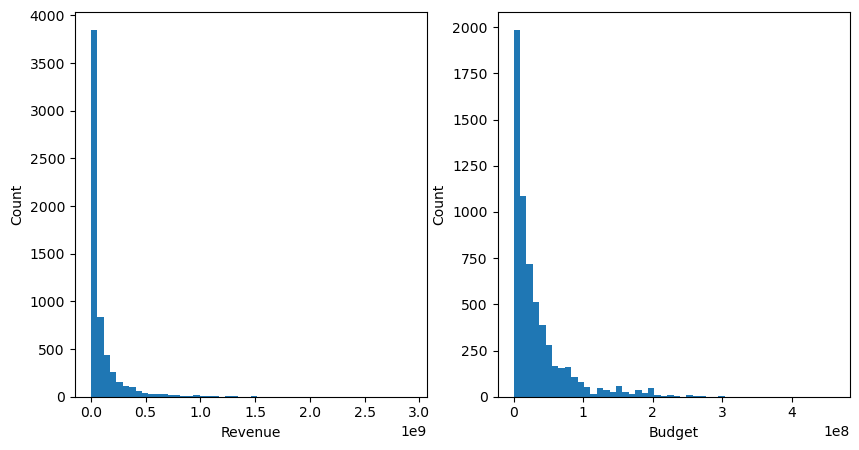

In [29]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))
#plot revenue
axis[0].hist(df_sub['Revenue'], bins = 50)
axis[0].set_xlabel("Revenue")
axis[0].set_ylabel("Count")

axis[1].hist(df_sub['Budget'], bins = 50)
axis[1].set_xlabel("Budget")
axis[1].set_ylabel("Count")
plt.show()

Observing the dataset, some features with low amount of non-null values will not be used in our analysis. 